<a href="https://colab.research.google.com/github/nvinay1303/hourly_energy_consumption/blob/main/AEP_hourly_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
import matplotlib.pyplot as plt
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Read Data

In [190]:
df = pd.read_csv('AEP_hourly.csv')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


# Understand the data

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [192]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


# Seperate the date and time from the Datetime column

In [193]:
# df['Date'] = pd.to_datetime(df['Datetime']).dt.date
# df['Time'] = pd.to_datetime(df['Datetime']).dt.time
# df['Year'] = pd.to_datetime(df['Datetime']).dt.year
# df['Month'] = pd.to_datetime(df['Datetime']).dt.month
# df['Day'] = pd.to_datetime(df['Datetime']).dt.day

In [194]:
#When was the highest energy consumption and which year
df[df['AEP_MW'] == df['AEP_MW'].max()]

,Datetime,AEP_MW
30221,2008-10-20 14:00:00,25695.0


In [195]:
df[df['AEP_MW'] == df['AEP_MW'].min()]

,Datetime,AEP_MW
100759,2016-10-02 05:00:00,9581.0


In [196]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [197]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


Text(-3.0555555555555554, 0.5, 'Power Generation (in MW)')

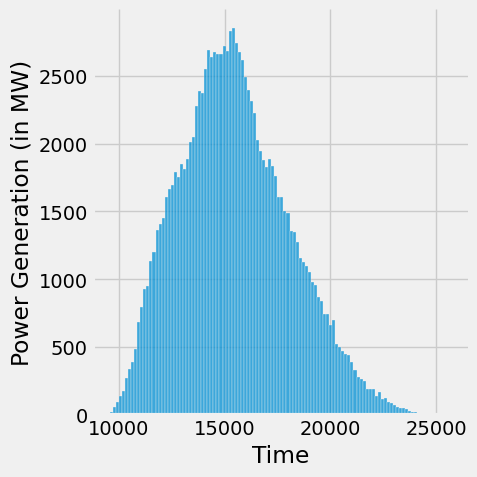

In [198]:
sns.displot(df['AEP_MW'])
plt.xlabel("Time")
plt.ylabel("Power Generation (in MW)")

In [201]:
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [218]:
df['Year'] = df.index.year
df['Month'] = df.index.strftime("%b")
df['Hour'] = df.index.hour.astype(str)
df['Week'] = df.index.strftime("%a")
df

,AEP_MW,Year,Month,hour,Week,Hour
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,2004,Dec,1,Fri,1
2004-12-31 02:00:00,12865.0,2004,Dec,2,Fri,2
2004-12-31 03:00:00,12577.0,2004,Dec,3,Fri,3
2004-12-31 04:00:00,12517.0,2004,Dec,4,Fri,4
2004-12-31 05:00:00,12670.0,2004,Dec,5,Fri,5
...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,2018,Jan,20,Mon,20
2018-01-01 21:00:00,20999.0,2018,Jan,21,Mon,21
2018-01-01 22:00:00,20820.0,2018,Jan,22,Mon,22


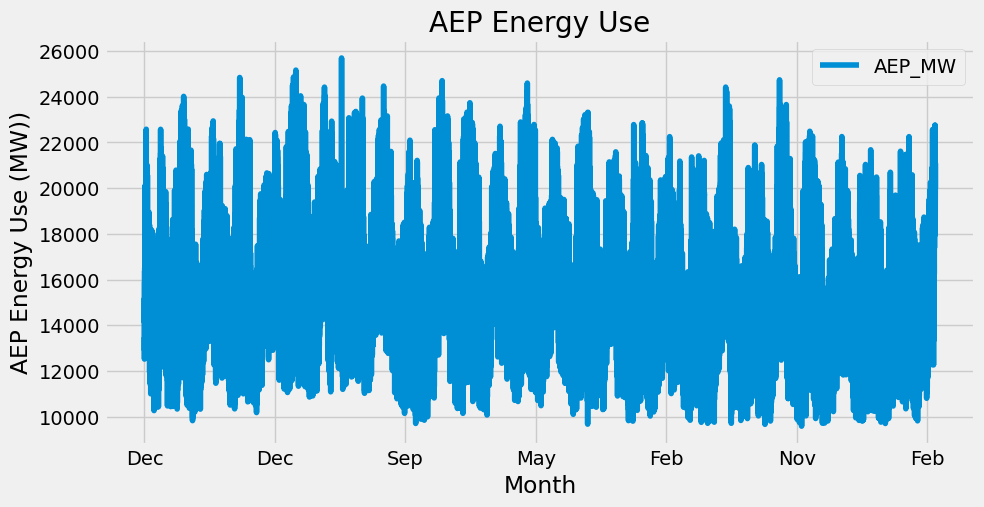

In [219]:
df.plot(x = 'Month', y= 'AEP_MW', figsize = (10,5), title = 'AEP Energy Use')
plt.ylabel("AEP Energy Use (MW))")
plt.show()

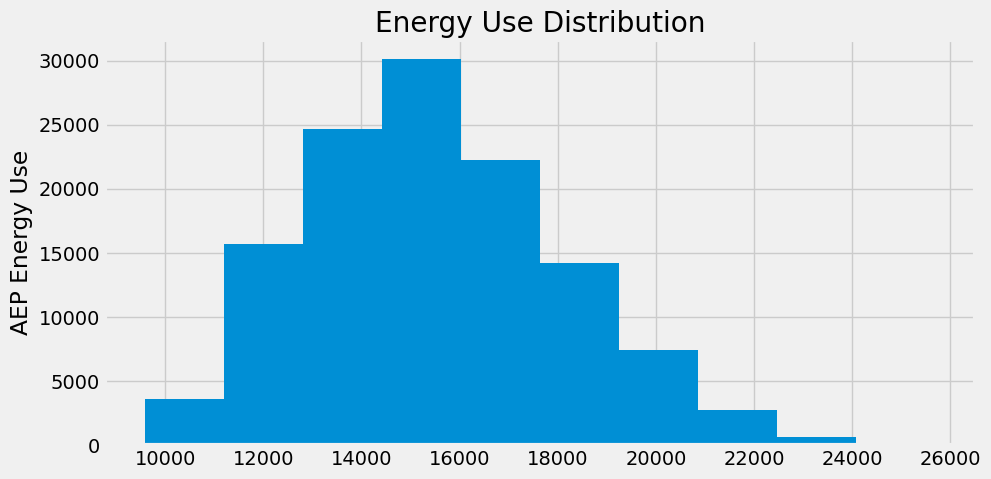

In [220]:
df['AEP_MW'].plot.hist(figsize = (10,5), title = 'Energy Use Distribution')
plt.ylabel("AEP Energy Use")
plt.show()

<Axes: xlabel='AEP_MW', ylabel='Count'>

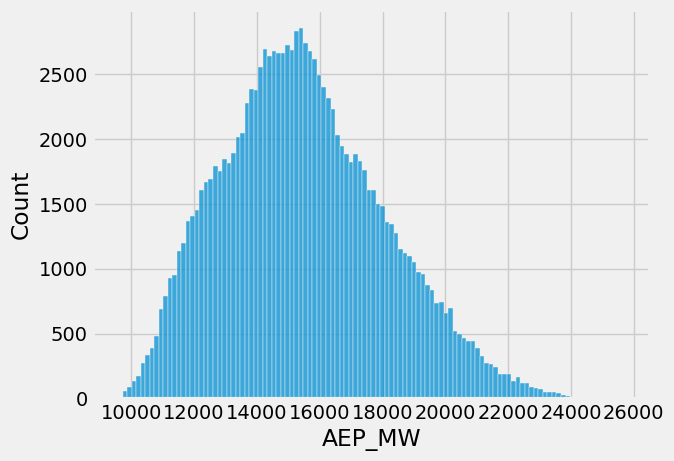

In [223]:
sns.histplot(data=df['AEP_MW'])

<ipython-input-232-402c18d78431>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  lineplot = sns.lineplot(data=df,x='Year',y='AEP_MW',palette='viridis',ax=ax)


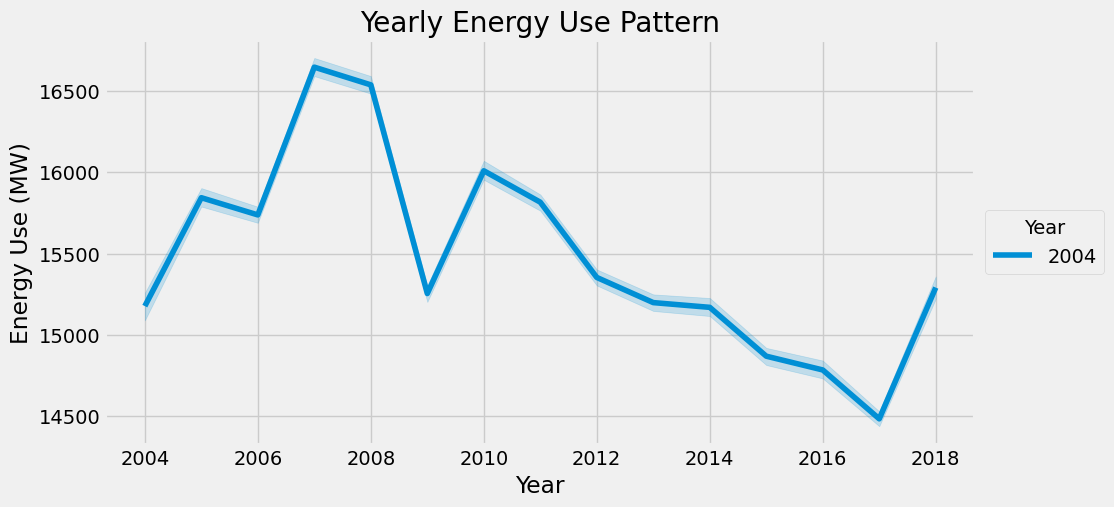

In [232]:
fig,ax = plt.subplots(figsize=(10,5))
lineplot = sns.lineplot(data=df,x='Year',y='AEP_MW',palette='viridis',ax=ax)
years = [str(year) for year in df['Year'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=years, title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year')
plt.ylabel('Energy Use (MW)')
plt.title('Yearly Energy Use Pattern')
plt.show()

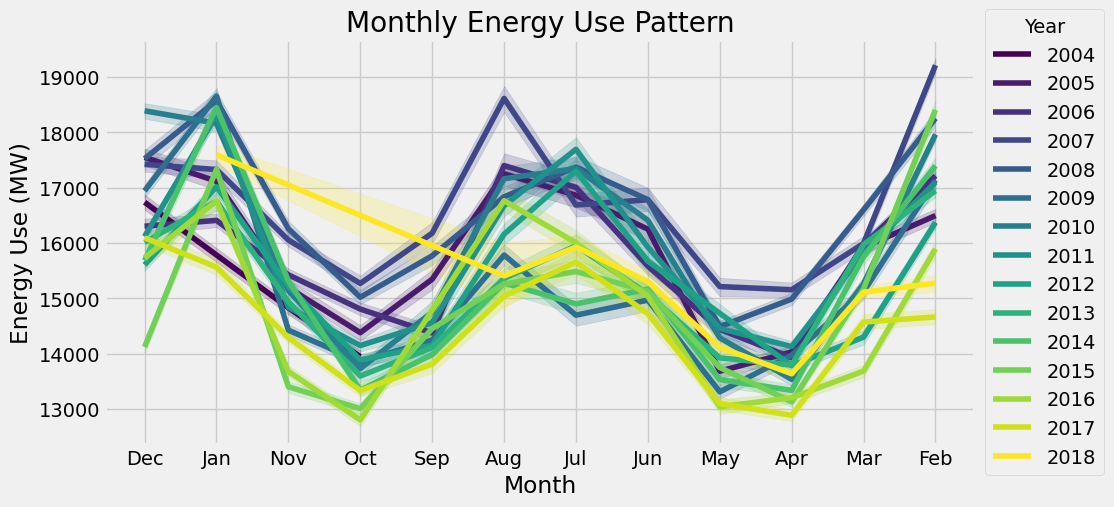

In [233]:
fig,ax = plt.subplots(figsize=(10,5))
lineplot = sns.lineplot(data=df,x='Month',y='AEP_MW',hue='Year',palette='viridis',ax=ax)
years = [str(year) for year in df['Year'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=years, title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Month')
plt.ylabel('Energy Use (MW)')
plt.title('Monthly Energy Use Pattern')
plt.show()

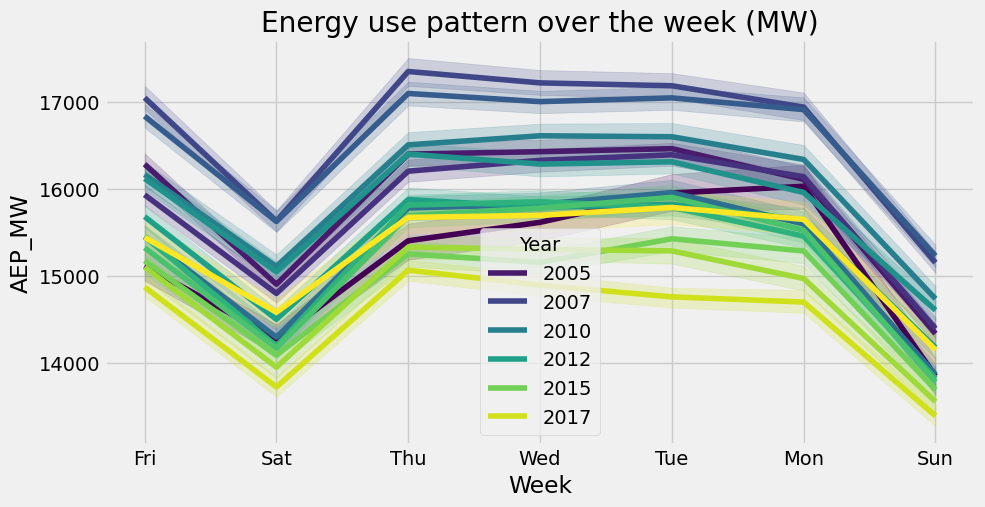

In [234]:
fig,ax = plt.subplots(figsize=(10,5))
lineplot = sns.lineplot(data=df,x='Week',y='AEP_MW',hue='Year',palette='viridis',ax=ax)
plt.title('Energy use pattern over the week (MW)')
plt.show()

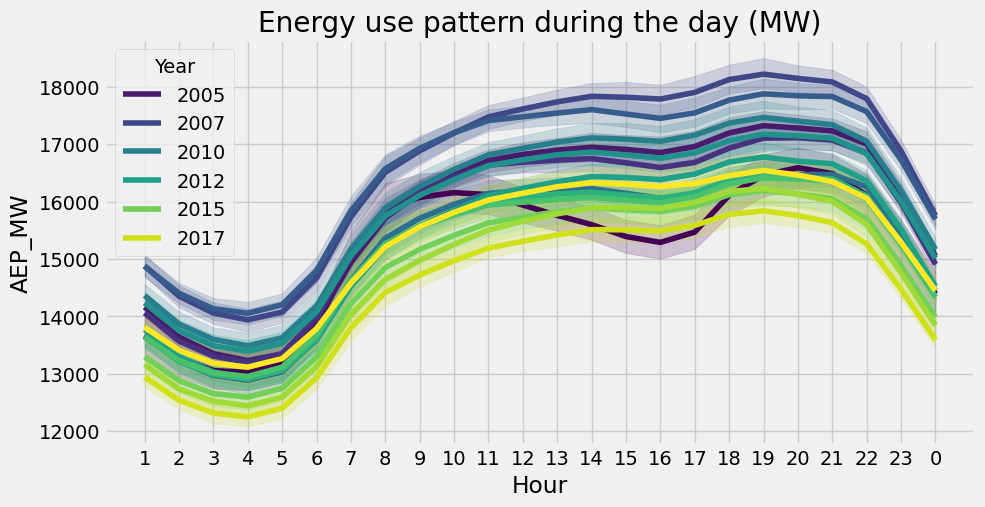

In [235]:
fig,ax = plt.subplots(figsize=(10,5))
lineplot = sns.lineplot(data=df,x='Hour',y='AEP_MW',hue='Year',palette='viridis',ax=ax)
plt.title('Energy use pattern during the day (MW)')
plt.show()